In [1]:
%load_ext autoreload
%autoreload 2

In [28]:
from copy import deepcopy

In [6]:
from index_calculator._indices import SCD

In [7]:
from pyhomogenize import open_xrdataset

In [8]:
snd_cordex = "/pool/data/CORDEX/data/cordex/output/EUR-11/KNMI/NCC-NorESM1-M/historical/r1i1p1/KNMI-RACMO22E/v1/day/snd/v20190415/snd_EUR-11_NCC-NorESM1-M_historical_r1i1p1_KNMI-RACMO22E_v1_day_19510101-19551231.nc"
snw_cordex = "/pool/data/CORDEX/data/cordex/output/EUR-11/KNMI/NCC-NorESM1-M/historical/r1i1p1/KNMI-RACMO22E/v1/day/snw/v20190415/snw_EUR-11_NCC-NorESM1-M_historical_r1i1p1_KNMI-RACMO22E_v1_day_19510101-19551231.nc"

In [38]:
ds_snd = open_xrdataset(snd_cordex)
ds_snw = open_xrdataset(snw_cordex)
ds_cordex = open_xrdataset([snd_cordex, snw_cordex])

In [40]:
ds_snd_ = deepcopy(ds_snd)
ds_cordex_ = deepcopy(ds_cordex)
ds_snw_ = deepcopy(ds_snw)
scd_single = SCD.compute(ds=ds_snd_)
scd_combined = SCD.compute(ds=ds_cordex_)
scd_snw = SCD.compute(ds=ds_snw_)
scd_snw_const = SCD.compute(ds=ds_snw_, snow_density=312)

snd in ds
snd in ds
snw_to_snd
    default
snw_to_snd
    312


# A: Plotting SCD calculated from `snd`:

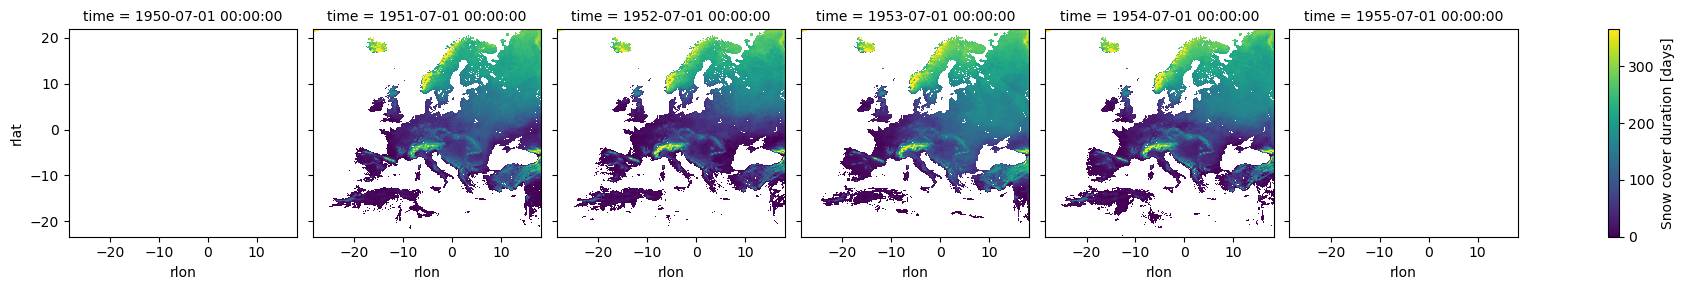

In [41]:
scd_single.plot(col="time")

# B: Plotting SCD calculated from `snw` using a constant snow density of `312 kg m-3`: 

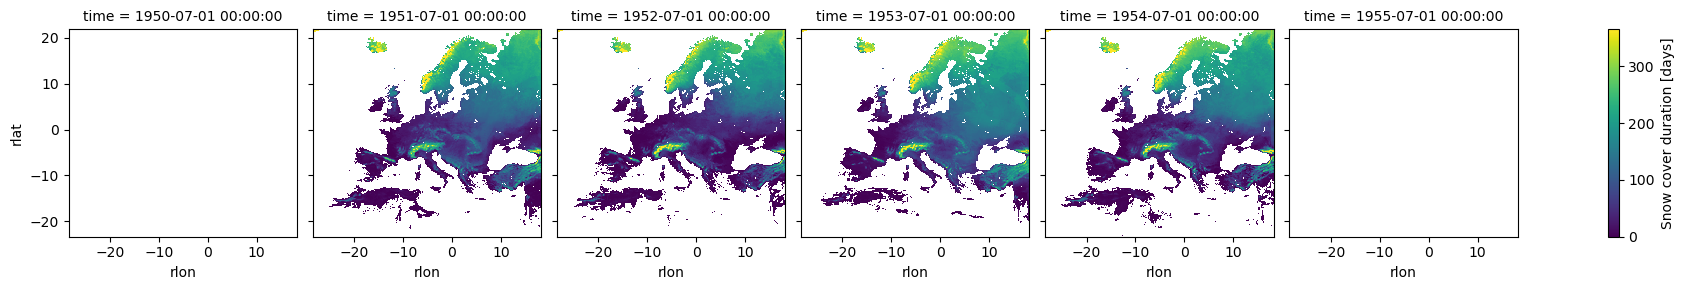

In [43]:
scd_snw.plot(col="time")

# C: Plotting the difference of `A` and `B`:
Ther are differences up to 30 days per year

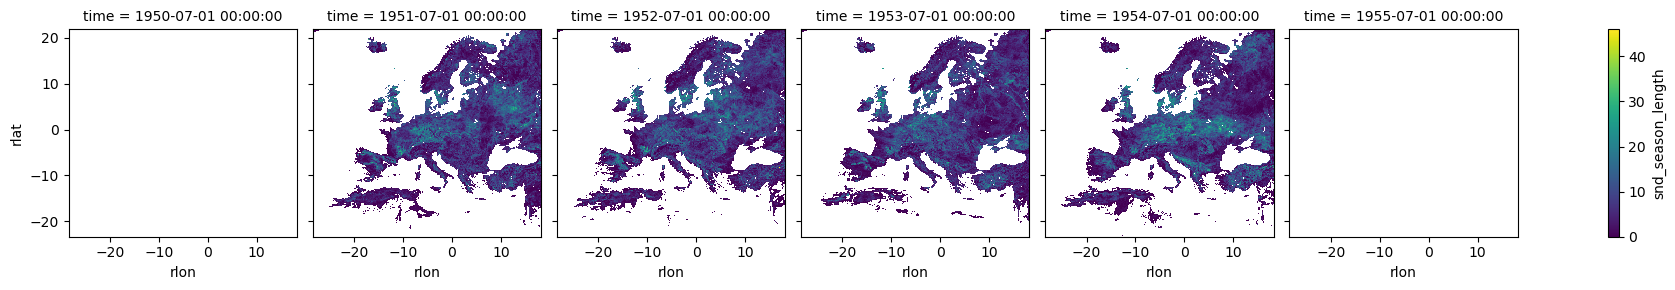

In [45]:
(scd_single - scd_snw).plot(col="time")

# D: Plotting `A`, `B` and `C` for East-Germany only:

In [63]:
def crop_east_germany(ds):
    return ds.sel(
        rlon=slice(-10, 0),
        rlat=slice(-5, 5),
    )

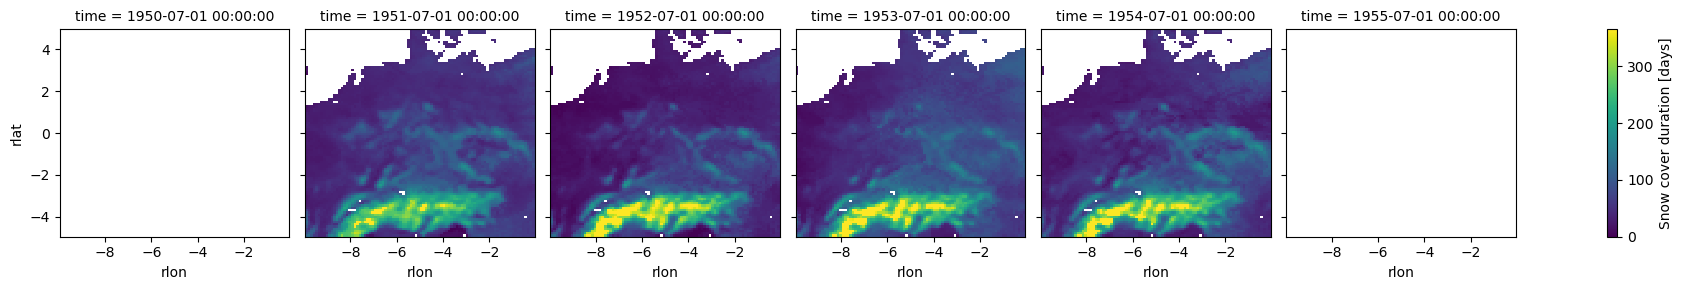

In [70]:
crop_east_germany(scd_single).plot(col="time")

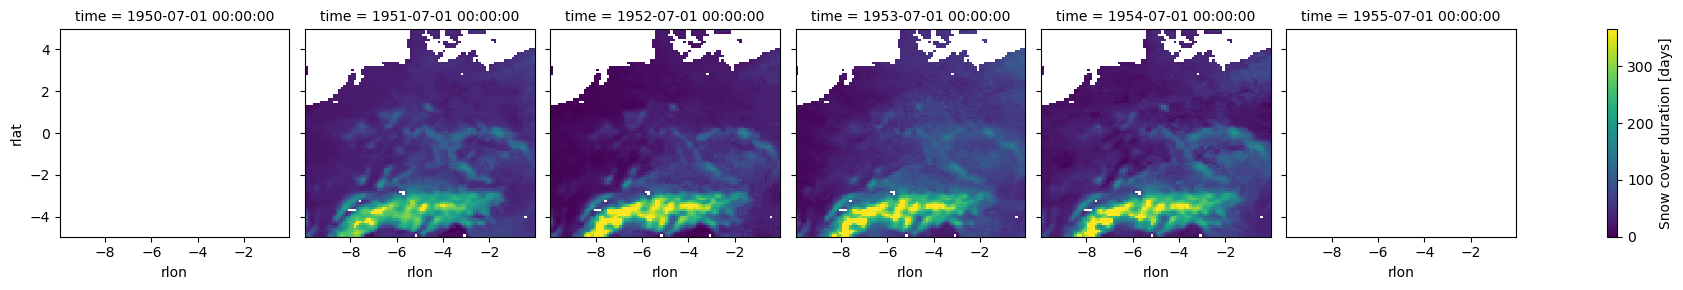

In [71]:
crop_east_germany(scd_snw).plot(col="time")

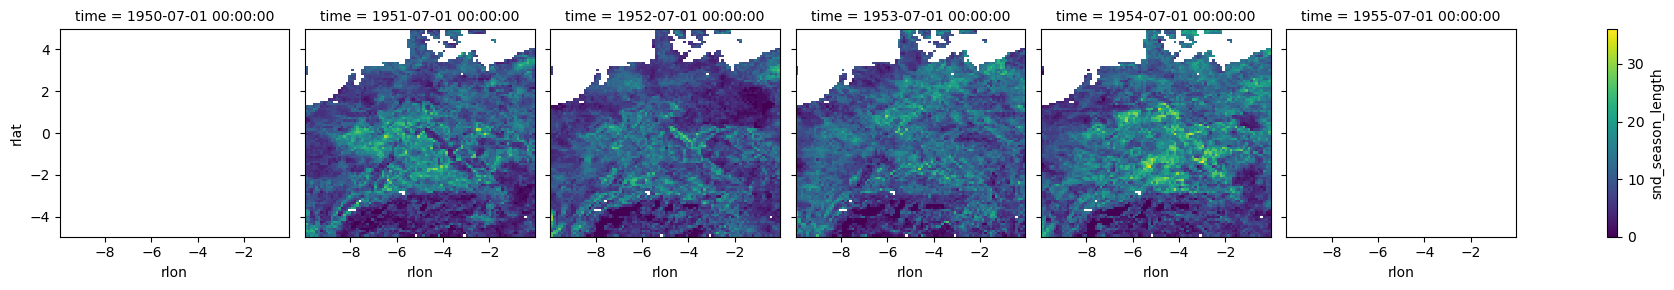

In [53]:
crop_east_germany(scd_single - scd_snw).plot(col="time")

# E: Plotting the snow density: `snw` / `snd`.

/work/ch0636/g300100/.conda/envs/mypy3/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


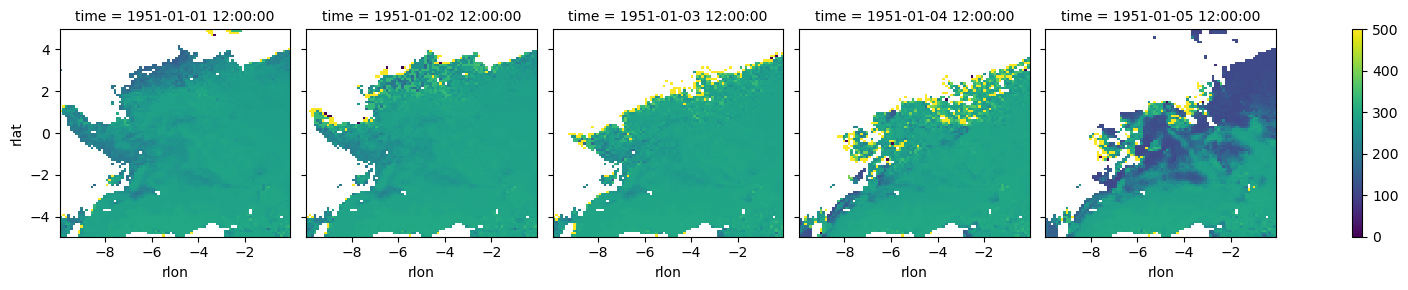

In [56]:
crop_east_germany(
    ds_snw["snw"].isel(time=slice(0, 5)) / ds_snd["snd"].isel(time=slice(0, 5))
).plot(col="time")

In [72]:
scd_single.time

<xarray.DataArray 'time' (time: 6)>
array([cftime.DatetimeNoLeap(1950, 7, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1951, 7, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1952, 7, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1953, 7, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1954, 7, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1955, 7, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1950-07-01 00:00:00 ... 1955-07-01 00:00:00